# Data Exploration Template
Use this notebook to perform initial exploratory data analysis (EDA) on new datasets. Fill in each section with project-specific details.

## Notebook Goals
- Document data sources and assumptions
- Inspect schema, data quality, and summary statistics
- Visualize key distributions and relationships
- Capture actionable follow-ups for feature engineering

In [38]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
pd.set_option("display.max_columns", 100)

DATA_DIR = Path(os.environ.get("DATA_DIR", "data"))
print(f"Using data directory: {DATA_DIR.resolve()}")

Using data directory: /usr/src/app/data


## Load Raw Dataset
Update the path, file format, and loader logic to match the dataset you want to explore.
Capture data source details (owner, refresh cadence, quirks) in a markdown cell once confirmed.

In [39]:
raw_path = DATA_DIR / "comp_data.csv"  # TODO: replace with the correct file
if not raw_path.exists():
    raise FileNotFoundError(f"Update raw_path; {raw_path} not found.")

df = pd.read_csv(raw_path)
df.head()

,timestep,INTERESTingProduct,James_Fund_007
0,0,3.500000,100.000000
1,1,3.511070,100.001203
2,2,3.524691,100.002473
3,3,3.546676,100.003916
4,4,3.565676,100.005457


## Quick Schema & Sample Rows

In [40]:
df.head()

,timestep,INTERESTingProduct,James_Fund_007
0,0,3.500000,100.000000
1,1,3.511070,100.001203
2,2,3.524691,100.002473
3,3,3.546676,100.003916
4,4,3.565676,100.005457


In [41]:
df.sample(5, random_state=42)

,timestep,INTERESTingProduct,James_Fund_007
1860,1860,4.450559,100.107105
353,353,2.846007,99.935780
1333,1333,3.981986,99.705569
905,905,3.437438,99.569399
1289,1289,3.895905,99.672936


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestep            2000 non-null   int64  
 1   INTERESTingProduct  2000 non-null   float64
 2   James_Fund_007      2000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


In [43]:
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
timestep,2000.0,999.500000,577.494589,0.000000,499.750000,999.500000,1499.250000,1999.000000
INTERESTingProduct,2000.0,3.568824,0.600829,2.297710,3.003411,3.670313,4.111866,4.532473
James_Fund_007,2000.0,99.840566,0.186717,99.566293,99.650652,99.848405,100.008425,100.201642


## Data Quality Checks
Track columns with high missingness or unusual values. Add commentary below.

In [44]:
missing = df.isna().mean().sort_values(ascending=False)
missing[missing > 0].to_frame('missing_rate')

,missing_rate


In [45]:
cardinality = df.nunique().sort_values(ascending=False)
cardinality.to_frame('unique_values')

,unique_values
timestep,2000
INTERESTingProduct,2000
James_Fund_007,2000


## Numeric Feature Distributions
Visualize key numeric features. Replace the selection logic as needed.

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

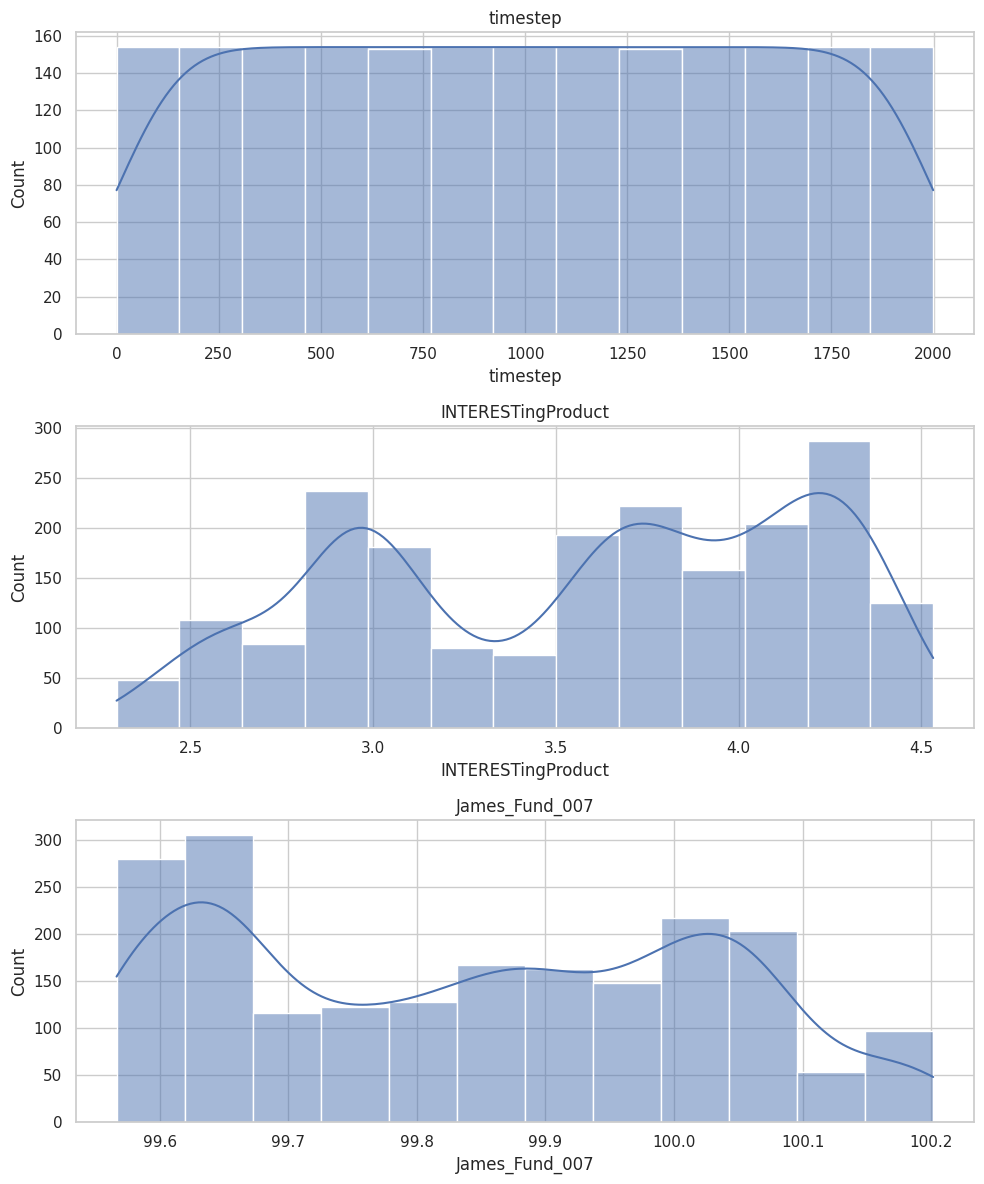

In [46]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
selected_numeric = numeric_cols[:6]  # TODO: curate this list

fig, axes = plt.subplots(nrows=len(selected_numeric), ncols=1, figsize=(10, 4 * len(selected_numeric)))
if not isinstance(axes, np.ndarray):
    axes = np.array([axes])
for ax, col in zip(axes, selected_numeric):
    sns.histplot(df[col].dropna(), ax=ax, kde=True)
    ax.set_title(col)
plt.tight_layout()

## Correlations & Relationships
Use pairplots, heatmaps, or custom charts to highlight important relationships.

Text(0.5, 1.0, 'Numeric Feature Correlation Heatmap')

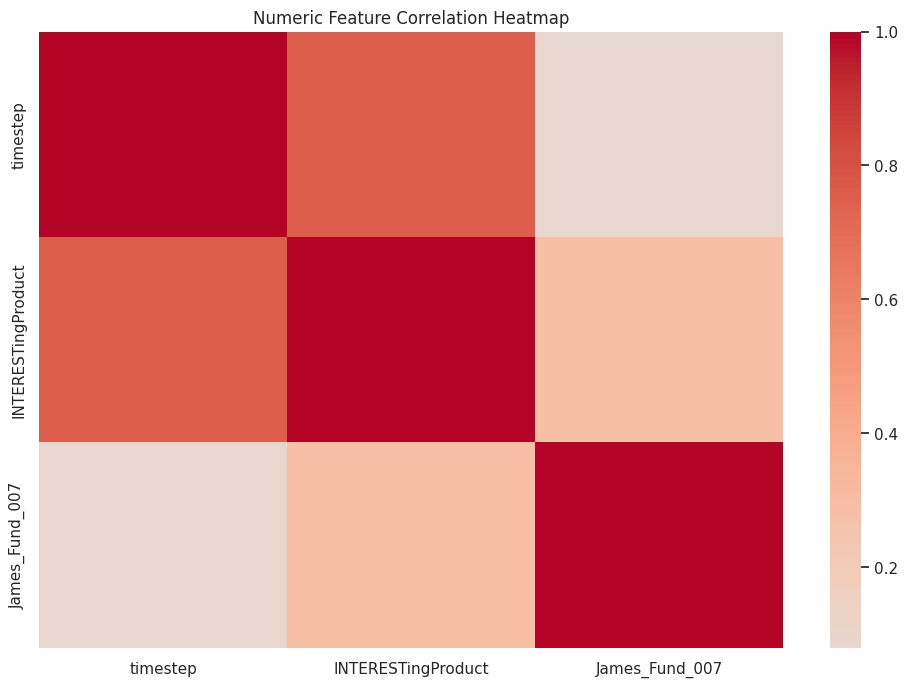

In [47]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Numeric Feature Correlation Heatmap')

## Categorical Feature Summary
Inspect top categories and their frequencies for categorical columns.

In [48]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
summary = {}
for col in categorical_cols[:5]:  # TODO: curate list
    summary[col] = df[col].value_counts(dropna=False).head(10)
summary

{}

## Time-Based Checks (Optional)
If the dataset has a temporal dimension, convert to datetime and inspect recency, seasonality, and missing spans.

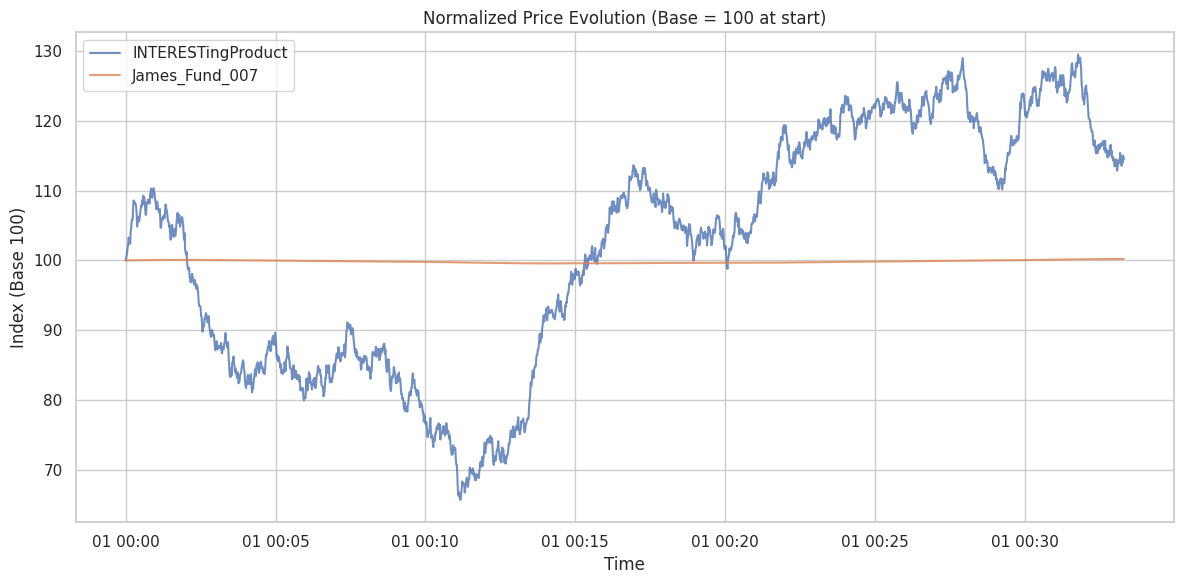

In [49]:
# Normalize each price series to a base of 100 at the start and plot relative changes
if not price_cols:
    raise ValueError("No candidate price columns found in price_cols.")

# base-100 normalization (value / first_value * 100)
normalized = df_ts[price_cols].div(df_ts[price_cols].iloc[0]).mul(100)

fig, ax = plt.subplots(figsize=(12, 6))
for col in normalized.columns:
    ax.plot(normalized.index, normalized[col], label=col, alpha=0.8)

ax.set_title("Normalized Price Evolution (Base = 100 at start)")
ax.set_xlabel("Time")
ax.set_ylabel("Index (Base 100)")
ax.legend(loc="best")
ax.grid(True)
plt.tight_layout()
plt.show()


### Check values for predictions

### File for parameters

## Findings & Next Actions
Summarize key takeaways and follow-ups for modeling or data engineering.

- **Data quality:** TODO
- **Feature ideas:** TODO
- **Risks/Gaps:** TODO

## Maybe for future prediction

In [ ]:
from __future__ import annotations

import math
from collections import deque
from typing import Dict, List

import numpy as np

# Pricing interfaces are provided by the evaluator at runtime. Provide
# light stubs for local linting / module import safety.
try:
    from pricing.Market import Market
    from pricing.Portfolio import Portfolio
except Exception:
    class Market: pass
    class Portfolio: pass


# -------------------------
# Configuration (tuneable)
# -------------------------
MU_ALPHA = 0.033
VAR_BETA = 0.011
VAR_FLOOR = 1e-6
PRICE_BUFFER_SIZE = 90
REBALANCE_EVERY = 5
SMOOTHING_GAMMA = 0.25
MIN_POS_DOLLARS = 1.0
MIN_TRADE_QTY = 1
MAX_WEIGHT_PER_ASSET = 0.45
MAX_GROSS_LEVERAGE = 1.0
MAX_UNIVERSE = None
TOP_K = None


class EWMAOnlineTrader:
    """Lightweight online EWMA trader suitable for Lambda constraints.

    - Keeps per-symbol EWMA mean and variance estimates.
    - Maps mu/var -> long-only weights using mu/var and enforces risk caps.
    - Applies smoothing and hysteresis to reduce turnover.
    """

    def __init__(self) -> None:
        # state per symbol
        self.price_buf: Dict[str, deque] = {}
        self.mu: Dict[str, float] = {}
        self.var: Dict[str, float] = {}
        self.prev_weights: Dict[str, float] = {}
        self.prev_qty: Dict[str, int] = {}
        self.call_count = 0

    # --- internal helpers ---
    def _update_price_and_stats(self, symbol: str, price: float) -> None:
        buf = self.price_buf.get(symbol)
        if buf is None:
            buf = deque(maxlen=PRICE_BUFFER_SIZE)
            self.price_buf[symbol] = buf
        # append new price
        if len(buf) > 0 and price == buf[-1]:
            # identical price; still keep but do not update stats to avoid zero returns
            buf.append(price)
            return
        prev = buf[-1] if len(buf) > 0 else None
        buf.append(price)
        if prev is None:
            return
        # compute simple return
        if prev == 0:
            return
        r = (price / prev) - 1.0
        # initialize if needed
        if symbol not in self.mu:
            self.mu[symbol] = float(r)
            self.var[symbol] = float(0.0)
            return
        # EWMA updates
        prev_mu = self.mu[symbol]
        new_mu = (1 - MU_ALPHA) * prev_mu + MU_ALPHA * r
        # variance update uses deviation from previous mean (more stable)
        prev_var = self.var[symbol]
        new_var = (1 - VAR_BETA) * prev_var + VAR_BETA * ((r - prev_mu) ** 2)
        self.mu[symbol] = float(new_mu)
        self.var[symbol] = float(new_var)

    def _collect_universe(self, market: Market) -> List[str]:
        universe = getattr(market, "universe", None)
        if universe is None:
            # market.quotes may be a dict mapping symbol->{...} or symbol->price
            quotes = getattr(market, "quotes", {})
            universe = list(quotes.keys())
        if MAX_UNIVERSE is not None and len(universe) > MAX_UNIVERSE:
            return list(universe)[:MAX_UNIVERSE]
        return list(universe)

    def _compute_weights(self, syms: List[str], nav: float) -> Dict[str, float]:
        # build arrays (only symbols with price and mu/var)
        prices = []
        mus = []
        vars_ = []
        good_syms = []
        for s in syms:
            buf = self.price_buf.get(s)
            if buf is None or len(buf) == 0:
                continue
            price = float(buf[-1])
            if math.isnan(price) or price <= 0:
                continue
            if s not in self.mu:
                continue
            v = float(self.var.get(s, 0.0))
            mus.append(float(self.mu.get(s, 0.0)))
            vars_.append(max(v, VAR_FLOOR))
            prices.append(price)
            good_syms.append(s)

        if len(good_syms) == 0:
            return {}

        mus = np.array(mus, dtype=float)
        vars_arr = np.array(vars_, dtype=float)

        # raw score: expected return per unit variance
        raw = mus / vars_arr
        # long-only: remove negatives
        raw = np.clip(raw, 0.0, None)

        total = float(raw.sum())
        if total <= 0:
            # fallback: equal weight among assets with non-negative mu or among all good_syms
            pos_mask = mus > 0
            if pos_mask.sum() > 0:
                w = pos_mask.astype(float) / float(pos_mask.sum())
            else:
                w = np.ones(len(good_syms), dtype=float) / float(len(good_syms))
        else:
            w = raw / total

        # enforce per-asset cap
        if MAX_WEIGHT_PER_ASSET is not None:
            w = np.minimum(w, MAX_WEIGHT_PER_ASSET)
            s = float(w.sum())
            if s <= 0:
                # degenerate after capping -> equal weight fallback
                w = np.ones_like(w) / float(len(w))
            else:
                w = w / s

        # smoothing with previous weights (align previous weights to current good_syms)
        prev_w = np.array([self.prev_weights.get(s, 0.0) for s in good_syms], dtype=float)
        w = (1 - SMOOTHING_GAMMA) * prev_w + SMOOTHING_GAMMA * w

        # enforce gross leverage cap (for long-only weights sum to 1 so gross==1; but keep generic)
        gross = float(np.sum(np.abs(w)))
        if gross > MAX_GROSS_LEVERAGE and gross > 0:
            w = w * (MAX_GROSS_LEVERAGE / gross)

        # prepare mapping symbol->weight
        return {s: float(wi) for s, wi in zip(good_syms, w)}

    def _weights_to_target_qty(self, weights: Dict[str, float], portfolio: Portfolio, nav: float) -> Dict[str, int]:
        targets: Dict[str, int] = {}
        # convert weights->dollar allocations->integer shares
        for s, w in weights.items():
            price = float(self.price_buf[s][-1])
            alloc = w * nav
            if alloc < MIN_POS_DOLLARS or price <= 0:
                qty = 0
            else:
                qty = int(round(alloc / price))
            targets[s] = qty
        return targets

    def _execute_trades(self, targets: Dict[str, int], portfolio: Portfolio) -> None:
        cur_positions = getattr(portfolio, "positions", {}) or {}
        for s, tgt in targets.items():
            cur = int(cur_positions.get(s, 0))
            diff = tgt - cur
            if abs(diff) < MIN_TRADE_QTY:
                continue
            if diff > 0:
                portfolio.buy(product=s, quantity=int(diff))
                self.prev_qty[s] = tgt
            elif diff < 0:
                portfolio.sell(product=s, quantity=int(abs(diff)))
                self.prev_qty[s] = tgt

    # --- public interface ---
    def on_quote(self, market: Market, portfolio: Portfolio) -> None:
        # Update internal state with incoming quotes
        self.call_count += 1
        quotes = getattr(market, "quotes", {})
        universe = self._collect_universe(market)

        for s in universe:
            q = quotes.get(s)
            if q is None:
                continue
            # quote may be a dict with 'price' or a simple numeric
            price = q["price"] if isinstance(q, dict) and "price" in q else q
            try:
                p = float(price)
            except Exception:
                continue
            if math.isnan(p):
                continue
            self._update_price_and_stats(s, p)

        # Only rebalance every REBALANCE_EVERY calls
        if (self.call_count % REBALANCE_EVERY) != 0:
            return

        # compute NAV using portfolio helper if available
        nav = 1.0
        nav_fn = getattr(portfolio, "_net_asset_value", None)
        if callable(nav_fn):
            try:
                nav = float(nav_fn())
                if nav <= 0 or math.isnan(nav):
                    nav = 1.0
            except Exception:
                nav = 1.0

        # compute weights and targets
        weights = self._compute_weights(universe, nav)
        if not weights:
            return
        targets = self._weights_to_target_qty(weights, portfolio, nav)

        # execute trades with hysteresis
        self._execute_trades(targets, portfolio)

        # update prev_weights for symbols considered
        for s, w in weights.items():
            self.prev_weights[s] = w


def build_trader() -> EWMAOnlineTrader:
    return EWMAOnlineTrader()